# Trigonometry (1) | Exploring the unit cirlce

## Table of Contents


- [Background](#background)
- [The Unit Circle](#the-unit-circle)
- [Sine/Cosine geometric relation](#sinecosine-geometric-relation)
- [Proving well-known concepts](#proving-well-known-concepts)
    - [(1) Rotation → Projection](#1-rotation-projection)
    - [(2) Pythagorean identity: $\cos^2\theta + \sin^2\theta = 1$](#2-pythagorean-identity)
    - [(3) Phase Shift Visualiser: $\cos(\theta) = \sin(\theta + \pi/2)$ | $ \cos(\theta) = \sin(\theta - \pi/2)$](#3-phase-shift-visualiser-)
    - [(4) Quadrant Signs + Symmetry (odd/even) | $\sin(-\theta) = -\sin(\theta) \quad \text{(odd)}$  ||  $\cos(-\theta) = \cos(\theta) \quad \text{(even)}$](#4-quadrant-signs-symmetry-oddeven-)
    - [(5) Small-Angle Intuition Visualiser  |  $\sin(\theta) \approx \theta$   ||   $1-\cos(\theta) \approx \theta^2/2$](#5-small-angle-intuition-visualiser-)
    - [(6) Complex-Plane Rotation | $e^{i\theta}=\cos\theta+i\sin\theta$](#6-complex-plane-rotation-)
    - [(7) Harmonic Motion from Circular Motion | $x(t)=\cos(\omega t+\phi)$  ||  $y(t)=\sin(\omega t+\phi)$](#7-harmonic-motion-from-circular-motion-)

## Background

In [49]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "serif",
    "mathtext.fontset": "cm",   # Computer Modern
    "axes.unicode_minus": False
})

from matplotlib.patches import Arc, FancyArrowPatch
from ipywidgets import interact, FloatSlider

## The Unit Circle

interactive(children=(FloatSlider(value=0.5235987755982988, description='θ (rad)', max=6.283185307179586, step…

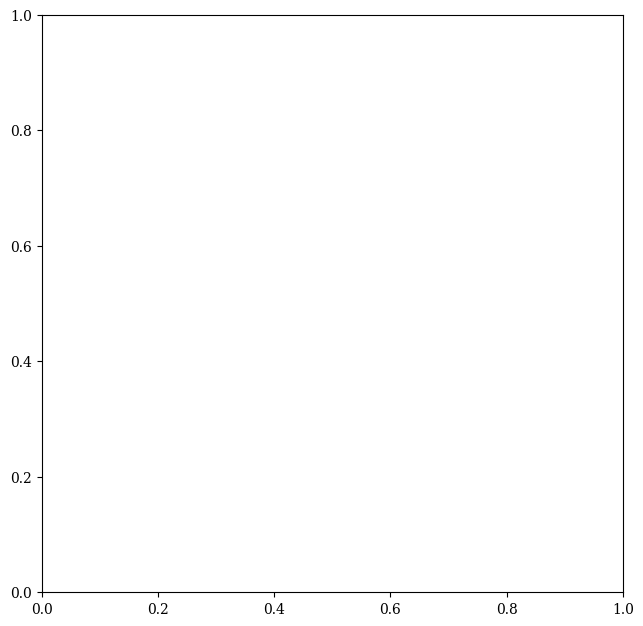

In [50]:
# =============================================================================
# Unit Circle: Sine & Cosine (Jupyter Notebook version)
# -----------------------------------------------------------------------------
# What you get:
#   - A clean unit circle plot
#   - A movable angle θ via an interactive slider (ipywidgets)
#   - The radius line, dashed projections, and the angle "closure" arc at origin
#
# Requirements:
#   pip install ipywidgets
#   (and in Jupyter you may need to enable widgets depending on your setup)
# =============================================================================

# If you're in Jupyter, this makes sure plots display inline.
# (If you prefer interactive pop-out windows, use: %matplotlib widget)
# %matplotlib inline


# =============================================================================
# Helper: draw the static "background" of the diagram
# -----------------------------------------------------------------------------
# This includes:
#   - axes lines
#   - the unit circle
#   - optional labeled special angles around the circle
# This part doesn't change when θ changes, so we draw it once each update.
# =============================================================================

def draw_unit_circle_background(ax, *, show_special_angles=True):
    # Keep x/y scaling the same so the circle doesn't become an ellipse
    ax.set_aspect("equal", adjustable="box")

    # Expand limits slightly beyond radius 1 so labels fit nicely
    ax.set_xlim(-1.25, 1.25)
    ax.set_ylim(-1.25, 1.25)

    # Draw coordinate axes
    ax.axhline(0, lw=1)
    ax.axvline(0, lw=1)

    # Draw the unit circle: x^2 + y^2 = 1
    t = np.linspace(0, 2 * np.pi, 800)
    ax.plot(np.cos(t), np.sin(t), lw=2)

    # A light grid can help learners “read” coordinates
    ax.grid(True, alpha=0.25)

    # Title
    ax.set_title("Sines and Cosines (Unit Circle)", fontsize=18)

    # Optional: mark common angles like π/6, π/4, π/3, ...
    if show_special_angles:
        special = [
            (0, "0"),
            (np.pi/6, r"$\pi/6$"),
            (np.pi/4, r"$\pi/4$"),
            (np.pi/3, r"$\pi/3$"),
            (np.pi/2, r"$\pi/2$"),
            (2*np.pi/3, r"$2\pi/3$"),
            (3*np.pi/4, r"$3\pi/4$"),
            (5*np.pi/6, r"$5\pi/6$"),
            (np.pi, r"$\pi$"),
            (7*np.pi/6, r"$7\pi/6$"),
            (5*np.pi/4, r"$5\pi/4$"),
            (4*np.pi/3, r"$4\pi/3$"),
            (3*np.pi/2, r"$3\pi/2$"),
            (5*np.pi/3, r"$5\pi/3$"),
            (7*np.pi/4, r"$7\pi/4$"),
            (11*np.pi/6, r"$11\pi/6$"),
        ]

        for ang, lab in special:
            x, y = np.cos(ang), np.sin(ang)
            ax.plot([x], [y], marker="o", ms=4)
            ax.text(1.08 * x, 1.08 * y, lab, ha="center", va="center", fontsize=10)


# =============================================================================
# Main: draw everything that depends on θ
# -----------------------------------------------------------------------------
# Conceptual mapping:
#   - Point on circle: (cosθ, sinθ)
#   - Radius line: from (0,0) to (cosθ, sinθ)
#   - Dashed projections show how x and y components relate to cos/sin
#   - Arc at origin shows the angle θ ("closure for theta")
# =============================================================================
def plot_theta(theta, *, show_special_angles=True):
    fig, ax = plt.subplots(figsize=(7.5, 7.5))

    # 1) Draw static background
    draw_unit_circle_background(ax, show_special_angles=show_special_angles)

    # 2) Compute the key geometry from θ
    #    On the unit circle, x = cos(θ) and y = sin(θ)
    x = float(np.cos(theta))
    y = float(np.sin(theta))

    # 3) Draw the radius line (origin to point)
    ax.plot([0, x], [0, y], lw=3)

    # 4) Draw dashed projection lines to visualize cos(θ) and sin(θ)
    #    - Vertical dashed line connects (x,0) to (x,y)
    #    - Horizontal dashed line connects (0,y) to (x,y)
    ax.plot([x, x], [0, y], ls="--", lw=2)
    ax.plot([0, x], [y, y], ls="--", lw=2)

    # 5) Mark the point (cosθ, sinθ)
    ax.plot([x], [y], marker="o", ms=9)

    # 6) Add the angle arc at the origin
    #    Matplotlib Arc uses degrees; convert radians -> degrees.
    theta_deg = np.degrees(theta)
    arc = Arc(
        (0, 0),
        width=0.55, height=0.55,    # size of the arc "bubble"
        angle=0,                    # rotate the arc frame (0 = standard)
        theta1=0, theta2=theta_deg, # arc from 0 to θ
        lw=3
    )
    ax.add_patch(arc)

    # 7) Place a θ label near the arc
    #    We'll place it at about half the angle (theta/2) on a smaller radius.
    ax.text(
        0.32 * np.cos(theta / 2),
        0.32 * np.sin(theta / 2),
        r"$\theta$",
        fontsize=12,
        ha="center",
        va="center",
    )

    # 8) Add numeric readouts of cos and sin
    #    (Learner-friendly: shows how the point coordinates are cos/sin)
    ax.text(-1.22, -1.08, rf"$\cos(\theta) = {x:.4f}$", fontsize=12)
    ax.text(-1.22, -1.18, rf"$\sin(\theta) = {y:.4f}$", fontsize=12)

    # 9) Optional: show the current θ value
    ax.text(-1.22, -0.98, rf"$\theta = {theta:.4f}\ \mathrm{{rad}}$", fontsize=12)

    plt.show()


# =============================================================================
# Interactive control (Jupyter)
# -----------------------------------------------------------------------------
# This makes a slider appear. Drag it to change θ and re-render the diagram.
# =============================================================================
interact(
    plot_theta,
    theta=FloatSlider(
        value=np.pi/6,
        min=0.0,
        max=2*np.pi,
        step=0.01,
        description="θ (rad)",
        continuous_update=True
    ),
    show_special_angles=True
);


## Sine/Cosine geometric relation

In [51]:
# =============================================================================
# Unit Circle Identity Visualiser (Jupyter)
#   cos(θ) = sin(π/2 − θ)
#
# Goal: match the TikTok-style diagram as closely as possible:
#   - Big identity title
#   - Unit circle with coloured special-angle dots + labels
#   - Two rays: θ and (π/2 − θ)
#   - Dashed projections
#   - Boxed values showing cos(θ) and sin(π/2 − θ) are the same
#   - Angle “closure” arc at the origin
#
# Requirements:
#   pip install ipywidgets
# =============================================================================

# -----------------------------------------------------------------------------
# Helpers for pretty tick labels like ±√2/2, ±√3/2, ±1/2, ±1
# -----------------------------------------------------------------------------
def _fmt_tick(v):
    eps = 1e-8
    mapping = {
        -1.0: r"$-1$",
        -np.sqrt(3)/2: r"$-\frac{\sqrt{3}}{2}$",
        -np.sqrt(2)/2: r"$-\frac{\sqrt{2}}{2}$",
        -0.5: r"$-\frac{1}{2}$",
        0.0: r"$0$",
        0.5: r"$\frac{1}{2}$",
        np.sqrt(2)/2: r"$\frac{\sqrt{2}}{2}$",
        np.sqrt(3)/2: r"$\frac{\sqrt{3}}{2}$",
        1.0: r"$1$",
    }
    for k, lab in mapping.items():
        if abs(v - k) < eps:
            return lab
    return rf"${v:.2f}$"


def set_pretty_ticks(ax):
    ticks = [-1, -np.sqrt(3)/2, -np.sqrt(2)/2, -0.5, 0, 0.5, np.sqrt(2)/2, np.sqrt(3)/2, 1]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels([_fmt_tick(t) for t in ticks], fontsize=12)
    ax.set_yticklabels([_fmt_tick(t) for t in ticks], fontsize=12)


# -----------------------------------------------------------------------------
# Static background: circle, axes, special angles + colours
# -----------------------------------------------------------------------------
def draw_unit_circle_background(ax):
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlim(-1.25, 1.25)
    ax.set_ylim(-1.25, 1.25)

    # axes
    ax.axhline(0, lw=1.6, color="black", alpha=0.55)
    ax.axvline(0, lw=1.6, color="black", alpha=0.55)

    # circle
    t = np.linspace(0, 2*np.pi, 800)
    ax.plot(np.cos(t), np.sin(t), lw=2.0, color="black", alpha=0.55)

    # ticks (no grid in the reference image)
    set_pretty_ticks(ax)

    # remove outer frame look
    for s in ax.spines.values():
        s.set_visible(False)

    # special angle points + labels (colours chosen to mimic style)
    # (angle, label, colour)
    pts = [
        (0, r"$0$", "#2ca02c"),
        (np.pi/6, r"$\pi/6$", "#ff7f0e"),
        (np.pi/4, r"$\pi/4$", "#1f77b4"),
        (np.pi/3, r"$\pi/3$", "#ff7f0e"),
        (np.pi/2, r"$\pi/2$", "#2ca02c"),
        (2*np.pi/3, r"$2\pi/3$", "#d62728"),
        (3*np.pi/4, r"$3\pi/4$", "#9467bd"),
        (5*np.pi/6, r"$5\pi/6$", "#8c564b"),
        (np.pi, r"$\pi$", "#e377c2"),
        (7*np.pi/6, r"$7\pi/6$", "#7f7f7f"),
        (5*np.pi/4, r"$5\pi/4$", "#1f77b4"),
        (4*np.pi/3, r"$4\pi/3$", "#7f7f7f"),
        (3*np.pi/2, r"$3\pi/2$", "#e377c2"),
        (5*np.pi/3, r"$5\pi/3$", "#8c564b"),
        (7*np.pi/4, r"$7\pi/4$", "#9467bd"),
        (11*np.pi/6, r"$11\pi/6$", "#d62728"),
    ]

    for ang, lab, col in pts:
        x, y = np.cos(ang), np.sin(ang)
        ax.plot(x, y, "o", ms=11, color=col, zorder=5)
        ax.text(1.14*x, 1.14*y, lab, color=col, fontsize=18, ha="center", va="center")

    # label "0" on right like the reference
    ax.text(1.12, -0.02, r"$0$", color="#2ca02c", fontsize=24, ha="left", va="center")


# -----------------------------------------------------------------------------
# Main plot: cosθ = sin(pi/2 - θ)
# -----------------------------------------------------------------------------
def plot_identity(theta):
    # Keep θ in [0, π/2] so (π/2 − θ) is also in [0, π/2]
    theta = float(theta)
    phi = np.pi/2 - theta

    fig, ax = plt.subplots(figsize=(8.5, 8.5))
    fig.suptitle(r"$\cos\theta=\sin\left(\frac{\pi}{2}-\theta\right)$", fontsize=40, y=0.98)

    draw_unit_circle_background(ax)

    # Colours (orange rays like screenshot)
    ray_col = "#ff7f0e"

    # Points on circle
    P_theta = np.array([np.cos(theta), np.sin(theta)])
    P_phi   = np.array([np.cos(phi),   np.sin(phi)])

    # Two rays with arrowheads
    def arrow_to(P, lw=4.0):
        arr = FancyArrowPatch(
            (0, 0), (P[0], P[1]),
            arrowstyle='-|>',
            mutation_scale=18,
            lw=lw,
            color=ray_col,
            zorder=6
        )
        ax.add_patch(arr)

    arrow_to(P_theta)
    arrow_to(P_phi)

    # --- Projections (dashed) ---
    # For θ-ray: show cos(θ) on x-axis via vertical dashed
    ax.plot([P_theta[0], P_theta[0]], [0, P_theta[1]], ls="--", lw=1.7, color=ray_col, alpha=0.9, zorder=4)

    # For φ-ray: show sin(φ) on y-axis via horizontal dashed
    ax.plot([0, P_phi[0]], [P_phi[1], P_phi[1]], ls="--", lw=1.7, color=ray_col, alpha=0.9, zorder=4)

    # --- Boxed values (the "exactly equal" highlight) ---
    # cos(θ) == sin(φ)
    val = np.cos(theta)

    # boxed on x-axis at cos(θ)
    ax.text(
        P_theta[0], -0.10,
        _fmt_tick(val),
        fontsize=18,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=ray_col, lw=2.2),
        zorder=10
    )

    # boxed on y-axis at sin(φ)
    ax.text(
        -0.12, P_phi[1],
        _fmt_tick(val),
        fontsize=18,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=ray_col, lw=2.2),
        zorder=10
    )

    # --- Angle arc at origin (black like reference) ---
    arc = Arc((0, 0), width=0.55, height=0.55, angle=0,
              theta1=0, theta2=np.degrees(theta), lw=2.2, color="black", zorder=7)
    ax.add_patch(arc)

    # small origin marker
    ax.text(0.02, -0.06, r"$0$", fontsize=18, ha="left", va="center")

    plt.show()


# -----------------------------------------------------------------------------
# Slider (θ from 0 to π/2 to match the identity diagram)
# -----------------------------------------------------------------------------
interact(
    plot_identity,
    theta=FloatSlider(
        value=np.pi/6,
        min=0.0,
        max=np.pi*2,
        step=0.01,
        description="θ (rad)",
        continuous_update=True
    )
);


interactive(children=(FloatSlider(value=0.5235987755982988, description='θ (rad)', max=6.283185307179586, step…

---
---

## Proving well-known concepts

### (1) Rotation → Projection

In [52]:
# =============================================================================
# (1) Rotation → Projection
#   cos(θ) = x-projection, sin(θ) = y-projection
# -----------------------------------------------------------------------------
# Visual goals (same style as your identity visualiser):
#   - Big title
#   - One ray at angle θ
#   - Dashed vertical + horizontal projections to axes
#   - Boxed readouts for cos(θ) and sin(θ)
#   - Angle arc at origin
# =============================================================================

def plot_rotation_projection(theta):
    theta = float(theta)

    fig, ax = plt.subplots(figsize=(8.5, 8.5))
    fig.suptitle(r"$\cos\theta\ \text{and}\ \sin\theta\ \text{as projections}$", fontsize=34, y=0.98)

    draw_unit_circle_background(ax)

    ray_col = "#ff7f0e"

    # Point on circle
    P = np.array([np.cos(theta), np.sin(theta)])

    # Ray with arrowhead
    arr = FancyArrowPatch(
        (0, 0), (P[0], P[1]),
        arrowstyle='-|>',
        mutation_scale=18,
        lw=4.0,
        color=ray_col,
        zorder=6
    )
    ax.add_patch(arr)

    # Projections (dashed)
    # vertical to x-axis: shows cos(theta)
    ax.plot([P[0], P[0]], [0, P[1]], ls="--", lw=1.7, color=ray_col, alpha=0.9, zorder=4)
    # horizontal to y-axis: shows sin(theta)
    ax.plot([0, P[0]], [P[1], P[1]], ls="--", lw=1.7, color=ray_col, alpha=0.9, zorder=4)

    # Boxed readouts
    c = float(np.cos(theta))
    s = float(np.sin(theta))

    # cos(theta) on x-axis
    ax.text(
        P[0], -0.11,
        _fmt_tick(c),
        fontsize=18,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=ray_col, lw=2.2),
        zorder=10
    )

    # sin(theta) on y-axis
    ax.text(
        -0.12, P[1],
        _fmt_tick(s),
        fontsize=18,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=ray_col, lw=2.2),
        zorder=10
    )

    # Optional: label the point (cosθ, sinθ) in a box near the point
    ax.text(
        1.05*P[0], 1.05*P[1],
        rf"$({ _fmt_tick(c) },\ { _fmt_tick(s) })$",
        fontsize=16,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="black", lw=1.5, alpha=0.95),
        zorder=10
    )

    # Angle arc at origin
    arc = Arc(
        (0, 0),
        width=0.55, height=0.55,
        angle=0,
        theta1=0, theta2=np.degrees(theta),
        lw=2.2, color="black",
        zorder=7
    )
    ax.add_patch(arc)

    # origin marker
    ax.text(0.02, -0.06, r"$0$", fontsize=18, ha="left", va="center")

    plt.show()


# Slider: let θ cover full circle for intuition
interact(
    plot_rotation_projection,
    theta=FloatSlider(
        value=np.pi/6,
        min=-np.pi,
        max=np.pi,
        step=0.01,
        description="θ (rad)",
        continuous_update=True
    )
);


interactive(children=(FloatSlider(value=0.5235987755982988, description='θ (rad)', max=3.141592653589793, min=…

### (2) Pythagorean identity: $\cos^2\theta + \sin^2\theta = 1$

In [53]:
# =============================================================================
# (2) Pythagorean Identity Visualiser
#   cos^2(θ) + sin^2(θ) = 1
# -----------------------------------------------------------------------------
# Same style:
#   - Big title
#   - Ray at θ
#   - Dashed projections
#   - Boxed values for cos(θ), sin(θ)
#   - Boxed identity readout showing cos^2 + sin^2
#   - Angle arc at origin
# =============================================================================

def plot_pythagorean_identity(theta):
    theta = float(theta)

    fig, ax = plt.subplots(figsize=(8.5, 8.5))
    fig.suptitle(r"$\cos^2\theta+\sin^2\theta=1$", fontsize=40, y=0.98)

    draw_unit_circle_background(ax)

    ray_col = "#ff7f0e"

    # Point on circle
    P = np.array([np.cos(theta), np.sin(theta)])

    # Ray with arrowhead
    arr = FancyArrowPatch(
        (0, 0), (P[0], P[1]),
        arrowstyle='-|>',
        mutation_scale=18,
        lw=4.0,
        color=ray_col,
        zorder=6
    )
    ax.add_patch(arr)

    # Projections (dashed)
    ax.plot([P[0], P[0]], [0, P[1]], ls="--", lw=1.7, color=ray_col, alpha=0.9, zorder=4)
    ax.plot([0, P[0]], [P[1], P[1]], ls="--", lw=1.7, color=ray_col, alpha=0.9, zorder=4)

    # Values
    c = float(np.cos(theta))
    s = float(np.sin(theta))
    ident = c*c + s*s

    # Box cos(theta)
    ax.text(
        P[0], -0.11,
        _fmt_tick(c),
        fontsize=18,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=ray_col, lw=2.2),
        zorder=10
    )

    # Box sin(theta)
    ax.text(
        -0.12, P[1],
        _fmt_tick(s),
        fontsize=18,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=ray_col, lw=2.2),
        zorder=10
    )

    # Identity box (top-left-ish)
    ax.text(
        -1.20, 1.18,
        rf"$\cos^2\theta+\sin^2\theta"
        rf"={c*c:.4f}+{s*s:.4f}"
        rf"={ident:.4f}$",
        fontsize=16,
        ha="left", va="top",
        bbox=dict(boxstyle="round,pad=0.35", fc="white", ec="black", lw=2.0, alpha=0.95),
        zorder=10
    )

    # Optional: show the squared terms boxed near axes (visual cue)
    ax.text(
        P[0], -0.23,
        rf"$\cos^2\theta={c*c:.4f}$",
        fontsize=13,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.22", fc="white", ec=ray_col, lw=1.6, alpha=0.95),
        zorder=10
    )
    ax.text(
        -0.20, P[1],
        rf"$\sin^2\theta={s*s:.4f}$",
        fontsize=13,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.22", fc="white", ec=ray_col, lw=1.6, alpha=0.95),
        zorder=10
    )

    # Angle arc at origin
    arc = Arc(
        (0, 0),
        width=0.55, height=0.55,
        angle=0,
        theta1=0, theta2=np.degrees(theta),
        lw=2.2, color="black",
        zorder=7
    )
    ax.add_patch(arc)

    # origin marker
    ax.text(0.02, -0.06, r"$0$", fontsize=18, ha="left", va="center")

    plt.show()


interact(
    plot_pythagorean_identity,
    theta=FloatSlider(
        value=np.pi/6,
        min=-np.pi,
        max=np.pi,
        step=0.01,
        description="θ (rad)",
        continuous_update=True
    )
);


interactive(children=(FloatSlider(value=0.5235987755982988, description='θ (rad)', max=3.141592653589793, min=…

### (3) Phase Shift Visualiser: $\cos(\theta) = \sin(\theta + \pi/2)$ | $ \cos(\theta) = \sin(\theta - \pi/2)$

In [54]:
# =============================================================================
# (3) Phase Shift Visualiser
#   sin(θ + π/2) = cos(θ)
# -----------------------------------------------------------------------------
# Same style:
#   - Big identity title
#   - Two rays: θ and (θ + π/2)
#   - Dashed projections that reveal equality:
#       cos(θ)  (x-projection of θ-ray)
#       sin(θ+π/2) (y-projection of shifted ray)
#   - Boxed equal values on axes
#   - Angle arc at origin (for θ)
# =============================================================================

def plot_phase_shift(theta):
    theta = float(theta)
    theta_shift = theta + np.pi/2

    fig, ax = plt.subplots(figsize=(8.5, 8.5))
    fig.suptitle(r"$\sin\!\left(\theta+\frac{\pi}{2}\right)=\cos\theta$", fontsize=38, y=0.98)

    draw_unit_circle_background(ax)

    ray_col = "#ff7f0e"

    # Points on circle
    P_theta  = np.array([np.cos(theta),        np.sin(theta)])
    P_shift  = np.array([np.cos(theta_shift),  np.sin(theta_shift)])

    # Rays
    def arrow_to(P, lw=4.0):
        arr = FancyArrowPatch(
            (0, 0), (P[0], P[1]),
            arrowstyle='-|>',
            mutation_scale=18,
            lw=lw,
            color=ray_col,
            zorder=6
        )
        ax.add_patch(arr)

    arrow_to(P_theta)
    arrow_to(P_shift, lw=3.2)

    # Projections
    # cos(theta): x-projection of theta-ray (vertical dashed)
    ax.plot([P_theta[0], P_theta[0]], [0, P_theta[1]], ls="--", lw=1.7, color=ray_col, alpha=0.9, zorder=4)

    # sin(theta+pi/2): y-projection of shifted ray (horizontal dashed to y-axis)
    ax.plot([0, P_shift[0]], [P_shift[1], P_shift[1]], ls="--", lw=1.7, color=ray_col, alpha=0.9, zorder=4)

    # Values
    val_cos = float(np.cos(theta))
    val_sin_shift = float(np.sin(theta_shift))  # equals cos(theta)

    # Box on x-axis at cos(theta)
    ax.text(
        P_theta[0], -0.11,
        _fmt_tick(val_cos),
        fontsize=18,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=ray_col, lw=2.2),
        zorder=10
    )

    # Box on y-axis at sin(theta+pi/2)
    ax.text(
        -0.12, P_shift[1],
        _fmt_tick(val_sin_shift),
        fontsize=18,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=ray_col, lw=2.2),
        zorder=10
    )

    # Label the two angles near their rays (small boxed labels)
    ax.text(
        0.55*np.cos(theta/2), 0.55*np.sin(theta/2),
        r"$\theta$",
        fontsize=16,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="black", lw=1.5, alpha=0.95),
        zorder=10
    )
    ax.text(
        0.60*np.cos(theta_shift/2), 0.60*np.sin(theta_shift/2),
        r"$\theta+\frac{\pi}{2}$",
        fontsize=15,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="black", lw=1.5, alpha=0.95),
        zorder=10
    )

    # Angle arc for theta (origin)
    arc = Arc(
        (0, 0),
        width=0.55, height=0.55,
        angle=0,
        theta1=0, theta2=np.degrees(theta),
        lw=2.2, color="black",
        zorder=7
    )
    ax.add_patch(arc)

    # small origin marker
    ax.text(0.02, -0.06, r"$0$", fontsize=18, ha="left", va="center")

    # Optional: numeric confirmation as figure text
    fig.text(
        0.02, 0.06,
        rf"$\cos\theta={val_cos:.4f},\ \sin(\theta+\pi/2)={val_sin_shift:.4f}$",
        fontsize=12
    )

    plt.show()


interact(
    plot_phase_shift,
    theta=FloatSlider(
        value=np.pi/6,
        min=-np.pi,
        max=np.pi,
        step=0.01,
        description="θ (rad)",
        continuous_update=True
    )
);


interactive(children=(FloatSlider(value=0.5235987755982988, description='θ (rad)', max=3.141592653589793, min=…

### (4) Quadrant Signs + Symmetry (odd/even) | $\sin(-\theta) = -\sin(\theta) \quad \text{(odd)}$  ||  $\cos(-\theta) = \cos(\theta) \quad \text{(even)}$


In [55]:
# =============================================================================
# (4) Quadrant Signs + Symmetry Visualiser (odd/even)
#   sin(-θ) = -sin(θ)   (odd)
#   cos(-θ) =  cos(θ)   (even)
# -----------------------------------------------------------------------------
# Same style:
#   - Big identity title
#   - Two rays: θ and -θ (mirrored across x-axis)
#   - Dashed projections to show x/y components
#   - Boxed values showing sign flip / sign preservation
#   - Angle arc at origin (for θ)
# -----------------------------------------------------------------------------
# Updates:
#   - Plotting syle revised after student raised issue of having difficulty 
#   to figure out which line meant which.
# =============================================================================

def plot_quadrants_symmetry_clean(theta):
    theta = float(theta)
    theta_m = -theta

    fig, ax = plt.subplots(figsize=(10, 11))
    fig.suptitle(
        r"$\cos(-\theta)=\cos\theta\quad\quad \sin(-\theta)=-\sin\theta$",
        fontsize=34, y=0.965
    )

    draw_unit_circle_background(ax)

    # Distinct colors
    col_t  = "#ff7f0e"   # θ
    col_mt = "#1f77b4"   # -θ

    # Points
    P  = np.array([np.cos(theta),   np.sin(theta)])
    Pm = np.array([np.cos(theta_m), np.sin(theta_m)])

    # Rays
    def arrow_to(Pt, color, lw):
        arr = FancyArrowPatch(
            (0, 0), (Pt[0], Pt[1]),
            arrowstyle='-|>',
            mutation_scale=18,
            lw=lw,
            color=color,
            zorder=6
        )
        ax.add_patch(arr)

    arrow_to(P,  col_t,  4.2)
    arrow_to(Pm, col_mt, 4.2)

    # --- Minimal, non-confusing projections ---
    # cos(theta): same for θ and -θ (show ONCE, from θ)
    ax.plot([P[0], P[0]], [0, P[1]], ls="--", lw=1.8, color=col_t, alpha=0.9, zorder=4)

    # sin(theta): show on y-axis (horizontal dashed from θ)
    ax.plot([0, P[0]], [P[1], P[1]], ls="--", lw=1.8, color=col_t, alpha=0.9, zorder=4)

    # sin(-theta): show on y-axis (horizontal dotted from -θ)
    ax.plot([0, Pm[0]], [Pm[1], Pm[1]], ls=":", lw=2.2, color=col_mt, alpha=0.9, zorder=4)

    # Values
    c  = float(np.cos(theta))
    s  = float(np.sin(theta))
    sm = float(np.sin(theta_m))

    # Box cos(theta) on x-axis
    ax.text(
        P[0], -0.11,
        _fmt_tick(c),
        fontsize=18,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=col_t, lw=2.2),
        zorder=10
    )

    # Box sin(theta) on y-axis (top / bottom depending on θ)
    ax.text(
        -0.13, P[1],
        _fmt_tick(s),
        fontsize=18,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=col_t, lw=2.2),
        zorder=10
    )

    # Box sin(-theta) on y-axis
    ax.text(
        -0.13, Pm[1],
        _fmt_tick(sm),
        fontsize=18,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=col_mt, lw=2.2),
        zorder=10
    )

    # Labels near rays (small boxed labels)
    ax.text(
        0.62*np.cos(theta/2), 0.62*np.sin(theta/2),
        r"$\theta$",
        fontsize=16,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec=col_t, lw=2.0, alpha=0.95),
        zorder=10
    )
    ax.text(
        0.62*np.cos(theta_m/2), 0.62*np.sin(theta_m/2),
        r"$-\theta$",
        fontsize=16,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec=col_mt, lw=2.0, alpha=0.95),
        zorder=10
    )

    # Angle arc (show only θ to avoid clutter)
    arc = Arc(
        (0, 0),
        width=0.60, height=0.60,
        angle=0,
        theta1=0, theta2=np.degrees(theta),
        lw=2.4, color="black",
        zorder=7
    )
    ax.add_patch(arc)

    # origin marker
    ax.text(0.02, -0.06, r"$0$", fontsize=18, ha="left", va="center")

    # Clean bottom readout
    fig.text(
        0.02, 0.02,
        rf"$\cos\theta={c:.4f},\ \cos(-\theta)={c:.4f}\quad|\quad \sin\theta={s:.4f},\ \sin(-\theta)={sm:.4f}$",
        fontsize=12,
        ha="left", va="bottom"
    )

    # Margins so nothing overlaps
    plt.subplots_adjust(top=0.90, bottom=0.12)

    plt.show()


interact(
    plot_quadrants_symmetry_clean,
    theta=FloatSlider(
        value=np.pi/3,
        min=-np.pi,
        max=np.pi,
        step=0.01,
        description="θ (rad)",
        continuous_update=True
    )
);

interactive(children=(FloatSlider(value=1.0471975511965976, description='θ (rad)', max=3.141592653589793, min=…

### (5) Small-Angle Intuition Visualiser $\qquad$ | $\qquad$ $\sin(\theta) \approx \theta$  $\qquad$ || $\qquad$  $1-\cos(\theta) \approx \theta^2/2$

In [56]:
# =============================================================================
# (5) Small-Angle Intuition Visualiser
#   sin(θ) ≈ θ
#   1 - cos(θ) ≈ θ^2 / 2
# -----------------------------------------------------------------------------
# Same style:
#   - Big title
#   - Unit circle + ray at θ
#   - Dashed projections
#   - Boxed numeric comparisons (exact vs approximation)
#   - Angle arc at origin
#
# Notes:
#   - Slider range is small on purpose (the approximation is a *local* idea)
# =============================================================================

def plot_small_angle(theta):
    theta = float(theta)

    fig, ax = plt.subplots(figsize=(10, 11))
    fig.suptitle(
        r"$\sin\theta\approx\theta\quad\quad 1-\cos\theta\approx\frac{\theta^2}{2}$",
        fontsize=30, y=0.965
    )

    draw_unit_circle_background(ax)

    # Colours
    col_t = "#ff7f0e"

    # Point on circle
    P = np.array([np.cos(theta), np.sin(theta)])

    # Ray at θ
    arr = FancyArrowPatch(
        (0, 0), (P[0], P[1]),
        arrowstyle='-|>',
        mutation_scale=18,
        lw=4.2,
        color=col_t,
        zorder=6
    )
    ax.add_patch(arr)

    # Projections
    ax.plot([P[0], P[0]], [0, P[1]], ls="--", lw=1.8, color=col_t, alpha=0.9, zorder=4)
    ax.plot([0, P[0]], [P[1], P[1]], ls="--", lw=1.8, color=col_t, alpha=0.9, zorder=4)

    # Values
    s = float(np.sin(theta))
    c = float(np.cos(theta))

    # Small-angle approximations (radians)
    s_approx = theta
    one_minus_c = 1.0 - c
    one_minus_c_approx = 0.5 * theta**2

    # Box sin(theta) on y-axis
    ax.text(
        -0.13, P[1],
        _fmt_tick(s) if abs(s) in [0, 0.5, np.sqrt(2)/2, np.sqrt(3)/2, 1] else rf"${s:.3f}$",
        fontsize=18,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=col_t, lw=2.2),
        zorder=10
    )

    # Box cos(theta) on x-axis (helps interpret 1 - cosθ)
    ax.text(
        P[0], -0.11,
        _fmt_tick(c) if abs(c) in [0, 0.5, np.sqrt(2)/2, np.sqrt(3)/2, 1] else rf"${c:.3f}$",
        fontsize=18,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=col_t, lw=2.2),
        zorder=10
    )

    # Angle arc at origin
    arc = Arc(
        (0, 0),
        width=0.60, height=0.60,
        angle=0,
        theta1=0, theta2=np.degrees(theta),
        lw=2.4, color="black",
        zorder=7
    )
    ax.add_patch(arc)

    # origin marker
    ax.text(0.02, -0.06, r"$0$", fontsize=18, ha="left", va="center")

    # Comparison box (top-left)
    err_s = s - s_approx
    err_c = one_minus_c - one_minus_c_approx

    fig.text(
        0.5, 0.88,
        rf"$\sin\theta={s:.6f}\quad\approx\quad \theta={theta:.6f}$"
        "\n"
        rf"$\Rightarrow\ \sin\theta-\theta={err_s:+.2e}$"
        "\n\n"
        rf"$1-\cos\theta={one_minus_c:.6f}\quad\approx\quad \frac{{\theta^2}}{{2}}={one_minus_c_approx:.6f}$"
        "\n"
        rf"$\Rightarrow\ (1-\cos\theta)-\frac{{\theta^2}}{{2}}={err_c:+.2e}$",
        fontsize=14,
        ha="center", va="top",
        bbox=dict(boxstyle="round,pad=0.60", fc="white", ec="black", lw=2.0, alpha=0.95),
        zorder=10
    )

    # Margins
    plt.subplots_adjust(top=0.75, bottom=0.12)

    plt.show()


interact(
    plot_small_angle,
    theta=FloatSlider(
        value=0.30,
        min=-1.20,
        max=1.20,
        step=0.005,
        description="θ (rad)",
        continuous_update=True
    )
);


interactive(children=(FloatSlider(value=0.3, description='θ (rad)', max=1.2, min=-1.2, step=0.005), Output()),…

### (6) Complex-Plane Rotation | $e^{i\theta}=\cos\theta+i\sin\theta$

In [57]:
# =============================================================================
# (6) Complex-Plane Rotation Visualiser
#   e^{iθ} = cos(θ) + i sin(θ)
# -----------------------------------------------------------------------------
# Same style goals:
#   - Big title
#   - Unit circle with special-angle dots + labels
#   - One ray (phasor) at θ
#   - Dashed projections to Real (x) and Imag (y)
#   - Boxed values for Re = cos(θ), Im = sin(θ)
#   - A boxed complex-number readout: z = cos(θ) + i sin(θ)
#   - Angle “closure” arc at origin
# =============================================================================

def plot_complex_rotation(theta):
    theta = float(theta)

    fig, ax = plt.subplots(figsize=(10, 11))
    fig.suptitle(r"$e^{i\theta}=\cos\theta+i\sin\theta$", fontsize=40, y=0.965)

    draw_unit_circle_background(ax)

    col = "#ff7f0e"

    # Point on unit circle (complex number z)
    P = np.array([np.cos(theta), np.sin(theta)])
    c = float(P[0])
    s = float(P[1])

    # Phasor ray
    arr = FancyArrowPatch(
        (0, 0), (P[0], P[1]),
        arrowstyle='-|>',
        mutation_scale=18,
        lw=4.2,
        color=col,
        zorder=6
    )
    ax.add_patch(arr)

    # Projections (dashed)
    ax.plot([P[0], P[0]], [0, P[1]], ls="--", lw=1.8, color=col, alpha=0.9, zorder=4)  # to x-axis
    ax.plot([0, P[0]], [P[1], P[1]], ls="--", lw=1.8, color=col, alpha=0.9, zorder=4)  # to y-axis

    # Box Re = cos(theta) on x-axis
    ax.text(
        P[0], -0.11,
        _fmt_tick(c) if abs(c) in [0, 0.5, np.sqrt(2)/2, np.sqrt(3)/2, 1] else rf"${c:.3f}$",
        fontsize=18,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=col, lw=2.2),
        zorder=10
    )

    # Box Im = sin(theta) on y-axis
    ax.text(
        -0.13, P[1],
        _fmt_tick(s) if abs(s) in [0, 0.5, np.sqrt(2)/2, np.sqrt(3)/2, 1] else rf"${s:.3f}$",
        fontsize=18,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=col, lw=2.2),
        zorder=10
    )

    # Label axes as Re/Im (small, unobtrusive)
    ax.text(1.20, -0.07, r"$\Re$", fontsize=18, ha="center", va="center")
    ax.text(-0.07, 1.20, r"$\Im$", fontsize=18, ha="center", va="center")

    # Angle arc at origin
    arc = Arc(
        (0, 0),
        width=0.60, height=0.60,
        angle=0,
        theta1=0, theta2=np.degrees(theta),
        lw=2.4, color="black",
        zorder=7
    )
    ax.add_patch(arc)

    # origin marker
    ax.text(0.02, -0.06, r"$0$", fontsize=18, ha="left", va="center")

    # Centered box under title (complex number readout)
    fig.text(
        0.575, 0.88,
        rf"$z=e^{{i\theta}}=\cos\theta+i\sin\theta"
        rf"\quad=\quad {c:.6f} + i\,{s:.6f}$"
        "\n"
        rf"$|z|=\sqrt{{\cos^2\theta+\sin^2\theta}}=1$",
        fontsize=16,
        ha="center", va="top",
        bbox=dict(boxstyle="round,pad=0.40", fc="white", ec="black", lw=2.0, alpha=0.95),
        zorder=10
    )
    
    fig.text(
    0.02, 0.88,
    r"$\Re(z)$ : real part $\;=\;\cos\theta$"
    "\n"
    r"$\Im(z)$ : imaginary part $\;=\;\sin\theta$",
    fontsize=14,
    ha="left", va="top",
    bbox=dict(
        boxstyle="round,pad=0.35",
        fc="white",
        ec="black",
        lw=1.8,
        alpha=0.95
    ),
    zorder=10
    )

    # Margins (match your latest layout pattern)
    plt.subplots_adjust(top=0.79, bottom=0.12)

    plt.show()


interact(
    plot_complex_rotation,
    theta=FloatSlider(
        value=np.pi/6,
        min=-np.pi,
        max=np.pi,
        step=0.01,
        description="θ (rad)",
        continuous_update=True
    )
);


interactive(children=(FloatSlider(value=0.5235987755982988, description='θ (rad)', max=3.141592653589793, min=…

-----
-----

### (7) Harmonic Motion from Circular Motion | $x(t)=\cos(\omega t+\phi)$  ||  $y(t)=\sin(\omega t+\phi)$

<h3> An introduction to signal processing fundamental | Don't worry this is just a teaser. </h3>

In [62]:
# =============================================================================
# (7A) Harmonic Motion from Circular Motion — HISTORY VIEW
#   - x-axis is relative time τ ∈ [-T, 0]
#   - the dashed cursor is fixed at τ = 0 (the "present")
#   - as the slider t changes, the waveform shifts underneath the fixed cursor
# =============================================================================

def plot_harmonic_motion_history(t):
    omega = 1.0
    phi = 0.0
    t = float(t)

    theta = omega * t + phi
    x_now = np.cos(theta)
    y_now = np.sin(theta)

    # history window (seconds)
    T = 2 * np.pi   # one period when omega=1
    tau = np.linspace(-T, 0.0, 900)

    # IMPORTANT: evaluate at (t + τ) so the waveform is a history ending at "now"
    x_hist = np.cos(omega * (t + tau) + phi)
    y_hist = np.sin(omega * (t + tau) + phi)

    fig = plt.figure(figsize=(13, 8))
    fig.suptitle("Harmonic Motion from Circular Motion (History View)", fontsize=30, y=0.97)

    gs = fig.add_gridspec(
        2, 2,
        width_ratios=[1.0, 1.4],
        height_ratios=[1.0, 1.0],
        wspace=0.35, hspace=0.35
    )

    # ---- Left: unit circle ----
    ax_circ = fig.add_subplot(gs[:, 0])
    draw_unit_circle_background(ax_circ)

    col = "#ff7f0e"
    P = np.array([x_now, y_now])

    arr = FancyArrowPatch(
        (0, 0), (P[0], P[1]),
        arrowstyle='-|>',
        mutation_scale=18,
        lw=4.0,
        color=col,
        zorder=6
    )
    ax_circ.add_patch(arr)

    ax_circ.plot([P[0], P[0]], [0, P[1]], ls="--", lw=1.8, color=col, alpha=0.9)
    ax_circ.plot([0, P[0]], [P[1], P[1]], ls="--", lw=1.8, color=col, alpha=0.9)

    ax_circ.text(
        P[0], -0.12, rf"${x_now:.3f}$",
        fontsize=16, ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=col, lw=2.0)
    )
    ax_circ.text(
        -0.14, P[1], rf"${y_now:.3f}$",
        fontsize=16, ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=col, lw=2.0)
    )

    arc = Arc((0, 0), width=0.55, height=0.55, angle=0,
              theta1=0, theta2=np.degrees(theta % (2*np.pi)),
              lw=2.2, color="black")
    ax_circ.add_patch(arc)

    # ---- Right-top: x-history ----
    ax_x = fig.add_subplot(gs[0, 1])
    ax_x.plot(tau, x_hist, lw=3.0, color=col)
    ax_x.axvline(0.0, ls="--", lw=2.0, color="black")             # fixed "now"
    ax_x.plot([0.0], [x_now], "o", ms=8, color=col)               # dot at now
    ax_x.set_title(r"$x(t)=\cos(\omega t+\phi)$", fontsize=20)
    ax_x.set_xlim(-T, 0.5)
    ax_x.set_ylim(-1.2, 1.2)
    ax_x.set_xlabel(r"$\tau\ (\mathrm{past}\rightarrow 0)$")
    ax_x.grid(True, alpha=0.25)

    # ---- Right-bottom: y-history ----
    ax_y = fig.add_subplot(gs[1, 1])
    ax_y.plot(tau, y_hist, lw=3.0, color=col)
    ax_y.axvline(0.0, ls="--", lw=2.0, color="black")             # fixed "now"
    ax_y.plot([0.0], [y_now], "o", ms=8, color=col)               # dot at now
    ax_y.set_title(r"$y(t)=\sin(\omega t+\phi)$", fontsize=20)
    ax_y.set_xlim(-T, 0.5)
    ax_y.set_ylim(-1.2, 1.2)
    ax_y.set_xlabel(r"$\tau\ (\mathrm{past}\rightarrow 0)$")
    ax_y.grid(True, alpha=0.25)

    plt.subplots_adjust(top=0.85, bottom=0.08)
    plt.show()


interact(
    plot_harmonic_motion_history,
    t=FloatSlider(
        value=0.0,
        min=0.0,
        max=12.0,
        step=0.02,
        description="t",
        continuous_update=True
    )
);

interactive(children=(FloatSlider(value=0.0, description='t', max=12.0, step=0.02), Output()), _dom_classes=('…

In [63]:
# =============================================================================
# (7B) Harmonic Motion from Circular Motion — TIMELINE VIEW
#   - x-axis is absolute time t ∈ [0, T_view]
#   - the wave is static (precomputed over the full timeline)
#   - the dashed cursor moves with the slider t
# =============================================================================

def plot_harmonic_motion_timeline(t):
    omega = 1.0
    phi = 0.0
    t = float(t)

    theta = omega * t + phi
    x_now = np.cos(theta)
    y_now = np.sin(theta)

    # timeline window
    T_view = 12.0
    tt = np.linspace(0.0, T_view, 900)

    x_wave = np.cos(omega * tt + phi)
    y_wave = np.sin(omega * tt + phi)

    fig = plt.figure(figsize=(13, 8))
    fig.suptitle("Harmonic Motion from Circular Motion (Timeline View)", fontsize=30, y=0.97)

    gs = fig.add_gridspec(
        2, 2,
        width_ratios=[1.0, 1.4],
        height_ratios=[1.0, 1.0],
        wspace=0.35, hspace=0.35
    )

    # ---- Left: unit circle ----
    ax_circ = fig.add_subplot(gs[:, 0])
    draw_unit_circle_background(ax_circ)

    col = "#ff7f0e"
    P = np.array([x_now, y_now])

    arr = FancyArrowPatch(
        (0, 0), (P[0], P[1]),
        arrowstyle='-|>',
        mutation_scale=18,
        lw=4.0,
        color=col,
        zorder=6
    )
    ax_circ.add_patch(arr)

    ax_circ.plot([P[0], P[0]], [0, P[1]], ls="--", lw=1.8, color=col, alpha=0.9)
    ax_circ.plot([0, P[0]], [P[1], P[1]], ls="--", lw=1.8, color=col, alpha=0.9)

    ax_circ.text(
        P[0], -0.12, rf"${x_now:.3f}$",
        fontsize=16, ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=col, lw=2.0)
    )
    ax_circ.text(
        -0.14, P[1], rf"${y_now:.3f}$",
        fontsize=16, ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=col, lw=2.0)
    )

    arc = Arc((0, 0), width=0.55, height=0.55, angle=0,
              theta1=0, theta2=np.degrees(theta % (2*np.pi)),
              lw=2.2, color="black")
    ax_circ.add_patch(arc)

    # ---- Right-top: x(t) timeline ----
    ax_x = fig.add_subplot(gs[0, 1])
    ax_x.plot(tt, x_wave, lw=3.0, color=col)
    ax_x.axvline(t, ls="--", lw=2.0, color="black")
    ax_x.plot([t], [x_now], "o", ms=8, color=col)
    ax_x.set_title(r"$x(t)=\cos(\omega t+\phi)$", fontsize=20)
    ax_x.set_xlim(0.0, T_view)
    ax_x.set_ylim(-1.2, 1.2)
    ax_x.set_xlabel(r"$t$")
    ax_x.grid(True, alpha=0.25)

    # ---- Right-bottom: y(t) timeline ----
    ax_y = fig.add_subplot(gs[1, 1])
    ax_y.plot(tt, y_wave, lw=3.0, color=col)
    ax_y.axvline(t, ls="--", lw=2.0, color="black")
    ax_y.plot([t], [y_now], "o", ms=8, color=col)
    ax_y.set_title(r"$y(t)=\sin(\omega t+\phi)$", fontsize=20)
    ax_y.set_xlim(0.0, T_view)
    ax_y.set_ylim(-1.2, 1.2)
    ax_y.set_xlabel(r"$t$")
    ax_y.grid(True, alpha=0.25)

    plt.subplots_adjust(top=0.85, bottom=0.08)
    plt.show()


interact(
    plot_harmonic_motion_timeline,
    t=FloatSlider(
        value=0.0,
        min=0.0,
        max=12.0,
        step=0.02,
        description="t",
        continuous_update=True
    )
);


interactive(children=(FloatSlider(value=0.0, description='t', max=12.0, step=0.02), Output()), _dom_classes=('…

---
----
----

In [65]:
import sys
from pathlib import Path
import importlib

# -----------------------------------------------------------------------------
# Robustly locate: <repo>/notebooks/For_Author
# -----------------------------------------------------------------------------
def _find_for_author_dir() -> Path:
    for base in [Path.cwd(), *Path.cwd().parents]:
        candidate = base / "notebooks" / "For_Author"
        if candidate.is_dir():
            return candidate
    raise FileNotFoundError("Could not find notebooks/For_Author by walking up from cwd.")

author_tools = _find_for_author_dir()

# Put it FIRST on sys.path (important if there are name collisions)
sys.path.insert(0, str(author_tools))

# Fresh import (handles notebook re-runs cleanly)
mod = importlib.import_module("retrieve_headings")
importlib.reload(mod)

make_toc = mod.make_toc

make_toc("Trignometry.ipynb")

TOC copied to clipboard:

## Table of Contents

- [Trigonometry (1) | Exploring the unit cirlce](#trigonometry-1-exploring-the-unit-cirlce)
  - [Table of Contents](#table-of-contents)
  - [Background](#background)
- [The Unit Circle](#the-unit-circle)
  - [Sine/Cosine geometric relation](#sinecosine-geometric-relation)
  - [Proving Myths](#proving-myths)
    - [(1) Rotation → Projection](#1-rotation-projection)
    - [(2) Pythagorean identity: $\cos^2\theta + \sin^2\theta = 1$](#2-pythagorean-identity)
    - [(3) Phase Shift Visualiser: $\cos(\theta) = \sin(\theta + \pi/2)$ | $ \cos(\theta) = \sin(\theta - \pi/2)$](#3-phase-shift-visualiser-)
    - [(4) Quadrant Signs + Symmetry (odd/even) | $\sin(-\theta) = -\sin(\theta) \quad \text{(odd)}$  ||  $\cos(-\theta) = \cos(\theta) \quad \text{(even)}$](#4-quadrant-signs-symmetry-oddeven-)
    - [(5) Small-Angle Intuition Visualiser $\qquad$ | $\qquad$ $\sin(\theta) \approx \theta$  $\qquad$ || $\qquad$  $1-\cos(\theta) \approx \theta^2/2$](